# 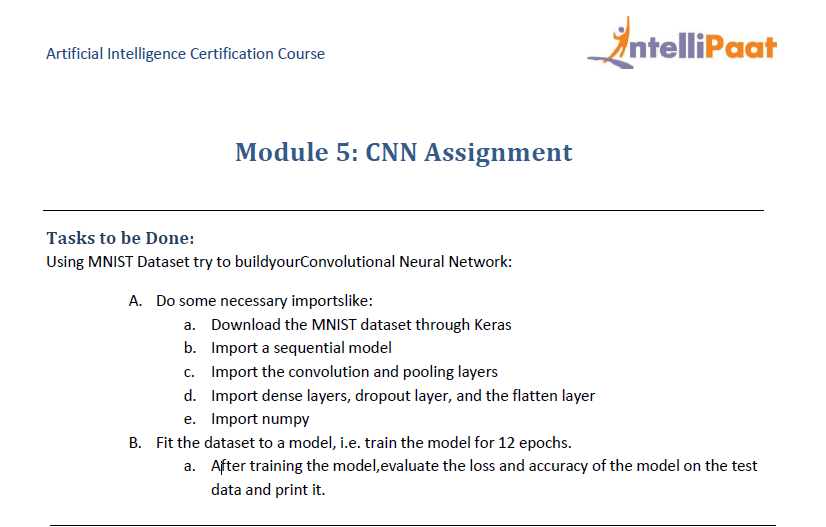

# A. Do some necessary importslike:
    a. Download the MNIST dataset through Keras
    b. Import a sequential model
    c. Import the convolution and pooling layers
    d. Import dense layers, dropout layer, and the flatten layer
    e. Import numpy

### 1. Importing important library to download MNIST dataset

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
# import cv2


import keras 
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input

from keras import backend as k

### a. Download the MNIST dataset through Keras

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

### b. Import a sequential model

In [5]:
from keras.models import Sequential

In [6]:
model = Sequential()

### c. Import the convolution and pooling layers


In [7]:
from keras.layers import Conv2D, MaxPooling2D

### d. Import dense layers, dropout layer, and the flatten layer

In [8]:
from keras.layers import Dense, Dropout, Flatten

### e. Import numpy

In [9]:
import numpy as np

In [10]:
img_rows, img_cols=28, 28
if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)
 
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [12]:
y_test.shape

(10000, 10)

# B. Fit the dataset to a model, i.e. train the model for 12 epochs.
    a. After training the model,evaluate the loss and accuracy of the model on the test data and print it.

### B.1 Preparing Model

In [13]:
model.add(tf.keras.layers.Input(shape=inpx, name="Input"))
model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 strides=(1,1),
                                 activation="relu",
                                 name="Conv1", ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3),
                                       strides =(2,2),
                                       padding="valid",
                                       name="Pool1"))
model.add(tf.keras.layers.Conv2D(filters=64,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 strides=(1,1),
                                 activation="relu",
                                 name="Conv2"))
model.add(tf.keras.layers.Flatten(name="Flat"))
model.add(tf.keras.layers.Dense(250, activation="relu", name="Dense1"))
model.add(tf.keras.layers.Dense(10, activation="softmax", name="Output"))

### B.1 Compiling Model using the optimizer = ‘adam’

In [14]:

model.compile(optimizer='adam', #tf.keras.optimizers.SGD()
              loss=tf.keras.losses.categorical_crossentropy,
              metrics = ["acc"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 26, 26, 32)        320       
                                                                 
 Pool1 (MaxPooling2D)        (None, 12, 12, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 10, 10, 64)        18496     
                                                                 
 Flat (Flatten)              (None, 6400)              0         
                                                                 
 Dense1 (Dense)              (None, 250)               1600250   
                                                                 
 Output (Dense)              (None, 10)                2510      
                                                                 
Total params: 1621576 (6.19 MB)
Trainable params: 162157

### B. 3 Fit the model using 12 ephos

In [ ]:
model.fit(x_train, y_train, epochs=12, batch_size=16)

Epoch 1/12
3750/3750 [==============================] - 105s 28ms/step - loss: 0.0980 - acc: 0.9700
Epoch 2/12
3750/3750 [==============================] - 107s 29ms/step - loss: 0.0362 - acc: 0.9887
Epoch 3/12
3750/3750 [==============================] - 105s 28ms/step - loss: 0.0235 - acc: 0.9926
Epoch 4/12
3750/3750 [==============================] - 105s 28ms/step - loss: 0.0186 - acc: 0.9941
Epoch 5/12
3750/3750 [==============================] - 107s 28ms/step - loss: 0.0133 - acc: 0.9957
Epoch 6/12
3750/3750 [==============================] - 108s 29ms/step - loss: 0.0103 - acc: 0.9966
Epoch 7/12
3750/3750 [==============================] - 128s 34ms/step - loss: 0.0082 - acc: 0.9974
Epoch 8/12
3750/3750 [==============================] - 122s 33ms/step - loss: 0.0086 - acc: 0.9975
Epoch 9/12
1683/3750 [============>.................] - ETA: 1:09 - loss: 0.0034 - acc: 0.9990

### B.4 Analysing Loss and Accuracy

In [ ]:
plt.plot(model.history.history["acc"], label="accuracy")
plt.plot(model.history.history["loss"], label ="Loss")
plt.legend()

### B.5 Checking accuracy

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

### B.6 Build another model where optimizer = ‘sgd’ and epoch = ‘12’

### B.7 Preparing Model 2

In [ ]:
model2 = Sequential()

In [ ]:
model2.add(tf.keras.layers.Input(shape=inpx, name="Input"))
model2.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 strides=(1,1),
                                 activation="relu",
                                 name="Conv1", ))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3),
                                       strides =(2,2),
                                       padding="valid",
                                       name="Pool1"))
model2.add(tf.keras.layers.Conv2D(filters=64,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 strides=(1,1),
                                 activation="relu",
                                 name="Conv2"))
model2.add(tf.keras.layers.Flatten(name="Flat"))
model2.add(tf.keras.layers.Dense(250, activation="relu", name="Dense1"))
model2.add(tf.keras.layers.Dense(10, activation="softmax", name="Output"))

### b.8 Compiling Model using the optimizer = ‘SDG’

In [ ]:

model2.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics = ["acc"])

In [ ]:
model2.summary()

### b.9 Fit the model using 50 ephos

In [ ]:
model2.fit(x_train, y_train, epochs=12, batch_size=16)

### b.10 Analysing Loss and Accuracy

In [ ]:
plt.plot(model2.history.history["acc"], label="accuracy")
plt.plot(model2.history.history["loss"], label ="Loss")
plt.legend()

### b.11 Checking accuracy

In [ ]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])